In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from IPython.display import display

import MESS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
SIMOUT = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/fig5_sims/SIMOUT.txt"
tmp_com = MESS.util.synthetic_community()
rgr = MESS.inference.Regressor(tmp_com, SIMOUT, algorithm="rf", verbose=True)
rgr.predict(select_features=False, param_search=False, quick=True, verbose=True)

Removed invariant targets. Retained: ['alpha', 'ecological_strength', 'J', 'm', 'generation', 'speciation_prob', '_lambda']


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,6781.600,0.119,3749.500,0.004,295.400,0.001,0.831


In [124]:
rgr.cross_val_predict()
print(rgr.cv_preds[:5])
rgr.cross_val_score()
print(rgr.cv_scores[:5])

[[3.55640e+03 8.85350e-02 4.98670e+03 4.57100e-03 2.66400e+02 1.85100e-03
  5.41455e-01]
 [5.96300e+03 1.99854e-01 6.58140e+03 3.62900e-03 1.91600e+02 2.83500e-03
  5.07169e-01]
 [5.96600e+03 1.86778e-01 3.50070e+03 3.24500e-03 4.22000e+01 1.69300e-03
  3.96319e-01]
 [5.03780e+03 2.38955e-01 2.04920e+03 2.70600e-03 6.26000e+01 2.05900e-03
  5.90114e-01]
 [6.38200e+03 1.06232e-01 6.81900e+03 3.64600e-03 2.05600e+02 3.29700e-03
  4.77589e-01]]
[0.46068048 0.4412846  0.47548057 0.49706436 0.50436934]


In [126]:
display(rgr.MAE)
display(rgr.RMSE)

alpha                 1526.424
ecological_strength      0.171
J                     1473.025
m                        0.002
generation              99.603
speciation_prob          0.001
_lambda                  0.190
dtype: float64

alpha                 42.401
ecological_strength    0.005
J                     40.559
m                      0.000
generation             5.143
speciation_prob        0.000
_lambda                0.005
dtype: float64

alpha                 1478.539
ecological_strength      0.156
J                     1413.786
m                        0.002
generation              94.518
speciation_prob          0.001
_lambda                  0.188
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aabf8611490>,
      dtype=object)

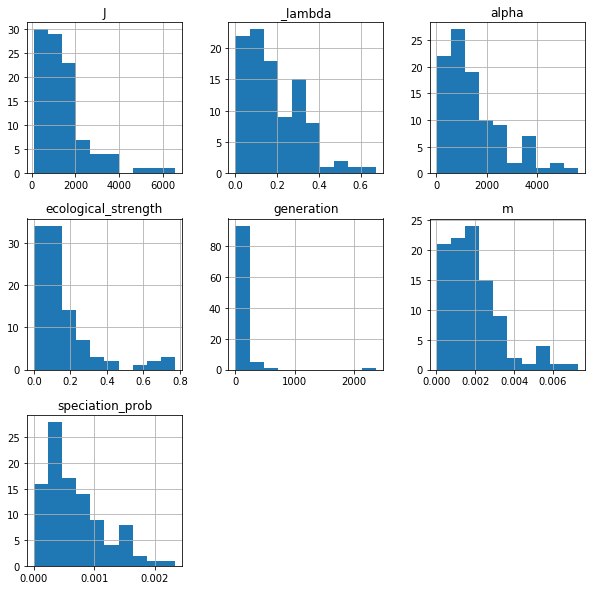

In [121]:
#print(rgr.cv_preds[:5])
#print(rgr.y[:5])

## Normalized mean absolute error
#error = np.abs((rgr.cv_preds - rgr.y)/rgr.y)[:100]

##
error = np.abs((rgr.cv_preds - rgr.y))[:100]
print(np.mean(error))
error.hist(figsize=(10,10))

In [122]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
## Normalized mean absolute error
#n = 100
#display(rgr.y[:n])
#display(pd.DataFrame(rgr.cv_preds)[:n])
mean_error = np.mean((rgr.cv_preds - rgr.y)**2)/len(rgr.y)
RMSE = np.sqrt(np.mean((rgr.cv_preds - rgr.y)**2)/len(rgr.y))
display(mean_error)
display(RMSE)
#display(np.sqrt(error))


alpha                 1802.267
ecological_strength      0.000
J                     1672.351
m                        0.000
generation              25.992
speciation_prob          0.000
_lambda                  0.000
dtype: float64

alpha                 42.453
ecological_strength    0.005
J                     40.894
m                      0.000
generation             5.098
speciation_prob        0.000
_lambda                0.005
dtype: float64

In [127]:
SIMOUT = "/home/iovercast/Continuosity/MESS/analysis/full-parameter-estimation/default_MESS/SIMOUT.txt"
tmp_com = MESS.util.synthetic_community()
cla = MESS.inference.Classifier(tmp_com, SIMOUT, algorithm="rf", verbose=True)


Got empirical summary statistics:
    S  abund_h1  abund_h2  abund_h3  abund_h4  pi_h1  pi_h2  pi_h3  pi_h4  \
0  10     9.402     9.031     8.776     8.584  7.289  6.539  6.190  5.979   

   mean_pi  ...    SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  SGD_7  \
0    0.049  ...        3      0      1      1      0      1      0      1   

   SGD_8  SGD_9  
0      1      2  

[1 rows x 48 columns]
No features previously selected, using all.


In [129]:
cla = MESS.inference.Classifier(tmp_com, SIMOUT, algorithm="rf", verbose=True)
cla.cross_val_predict(verbose=True, quick=True)
cla.cross_val_score()
print(cla.cv_preds)
print(cla.cv_scores)


Got empirical summary statistics:
    S  abund_h1  abund_h2  abund_h3  abund_h4  pi_h1  pi_h2  pi_h3  pi_h4  \
0  10     9.402     9.031     8.776     8.584  7.289  6.539  6.190  5.979   

   mean_pi  ...    SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  SGD_7  \
0    0.049  ...        3      0      1      1      0      1      0      1   

   SGD_8  SGD_9  
0      1      2  

[1 rows x 48 columns]
No features previously selected, using all.

Estimator has not been optimized prior to CV. Performing estimator CV skipping
feature selection and hyperparameter optimization. For better performance call
predict() on the estimator prior to calling the cv_predict/cv_score methods.



/home/iovercast/Continuosity/MESS/MESS/inference.py:361: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_model.fit(self.X, self.y)


['neutral' 'competition' 'competition' ... 'filtering' 'competition'
 'neutral']
[0.77227424 0.79371791 0.78791541 0.7978852  0.80181269]


In [38]:
type(cla)(tmp_com, SIMOUT, algorithm="rf", verbose=True)


Got empirical summary statistics:     S  abund_h1  abund_h2  abund_h3  abund_h4     pi_h1     pi_h2     pi_h3  \
0  10  8.512748  7.550586  6.948253  6.564836  7.516197  6.676461  6.270421   

      pi_h4   mean_pi  ...    SGD_0  SGD_1  SGD_2  SGD_3  SGD_4  SGD_5  SGD_6  \
0  6.027077  0.032973  ...        2      1      2      0      0      1      1   

   SGD_7  SGD_8  SGD_9  
0      1      1      1  

[1 rows x 48 columns]
No features previously selected, using all.


<class 'MESS.inference.Classifier'>: nsims - 16552
	Features - ['S', 'abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'pi_h1', 'pi_h2', 'pi_h3', 'pi_h4', 'mean_pi', 'std_pi', 'skewness_pi', 'kurtosis_pi', 'median_pi', 'iqr_pi', 'mean_dxys', 'std_dxys', 'skewness_dxys', 'kurtosis_dxys', 'median_dxys', 'iqr_dxys', 'trees', 'trait_h1', 'trait_h2', 'trait_h3', 'trait_h4', 'mean_local_traits', 'std_local_traits', 'skewness_local_traits', 'kurtosis_local_traits', 'median_local_traits', 'iqr_local_traits', 'abundance_dxy_cor', 'abundance_pi_cor', 'abundance_trait_cor', 'dxy_pi_cor', 'dxy_trait_cor', 'pi_trait_cor', 'SGD_0', 'SGD_1', 'SGD_2', 'SGD_3', 'SGD_4', 'SGD_5', 'SGD_6', 'SGD_7', 'SGD_8', 'SGD_9']
	Targets - ['community_assembly_model']